## APPLIED STATISTICS

### Turma 10DTSR

### Trabalho prático usando o Python¶
## Noções de probabilidadede

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import math
import random
import scipy.stats as stat


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



## Distribuição Normal Padrão ou Normal Reduzida

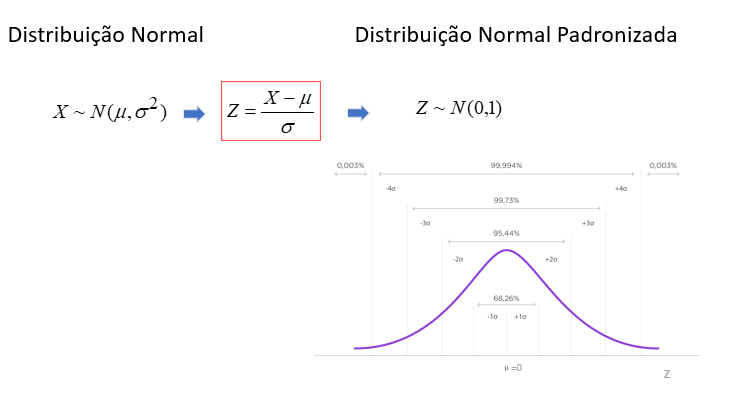

In [ ]:
# Use a Tabela Normal Padrão para encontrar a probabilidade:

1) P(Z > 0) = 0.50

2) P(Z < 0) = 0.50

3) P(Z > 1.96) = 0.50 -0.475 = 0.025

4) P(Z < -1.96) = 0.50 - 0.475 = 0.025

5) P(-1.96 < Z < +1.96) = 0.475 + 0.475 = 0.95

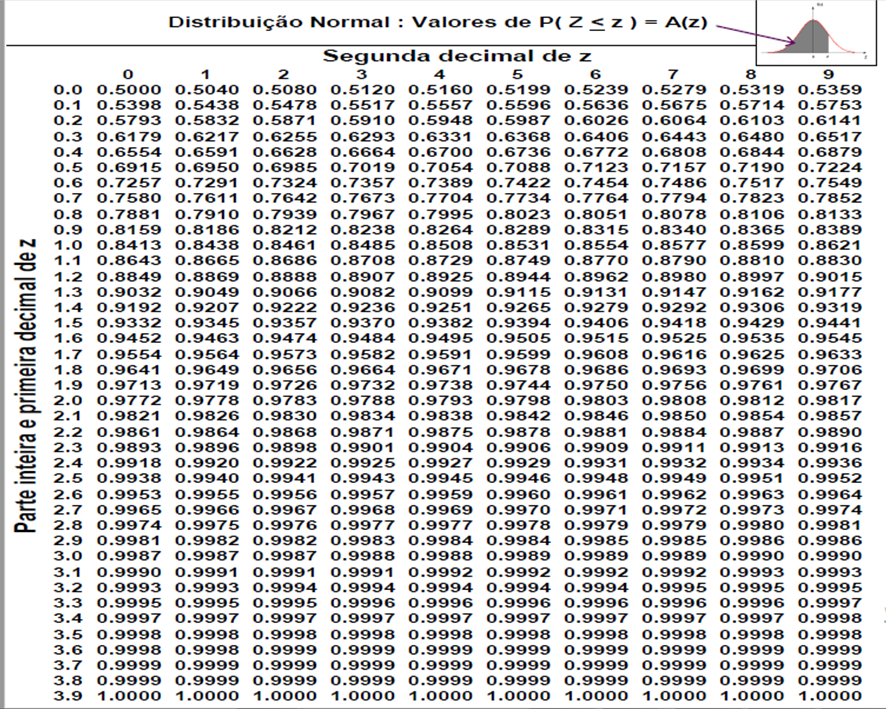

## Ingestão de sal no Brasil

In [3]:
# Importar os dados de ingestão de sal da Pesquisa Nacional de Saúde (PNS) 2013 do IBGE

sal = pd.read_excel(r'sal_lab1.xlsx')

In [5]:
sal.head()

,ID,Ingestao_Sal,regiao,p75
0,1,8.56,Centro-Oeste,Menor p75
1,2,7.44,Norte,Menor p75
2,3,10.30,Nordeste,Menor p75
3,4,7.68,Nordeste,Menor p75
4,7,10.08,Nordeste,Menor p75


In [7]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8080 entries, 0 to 8079
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            8080 non-null   int64  
 1   Ingestao_Sal  8080 non-null   float64
 2   regiao        8080 non-null   object 
 3   p75           8080 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 252.6+ KB


In [9]:
sal.isna().sum()

ID              0
Ingestao_Sal    0
regiao          0
p75             0
dtype: int64

In [ ]:
# Análise descritiva da Ingestão de sal

In [11]:
sal.describe()

,ID,Ingestao_Sal
count,8080.000000,8080.000000
mean,4469.616708,9.136048
std,2576.914687,2.316944
min,1.000000,1.130000
25%,2237.750000,7.625587
50%,4473.000000,9.022889
75%,6716.500000,10.549696
max,8949.000000,28.278044


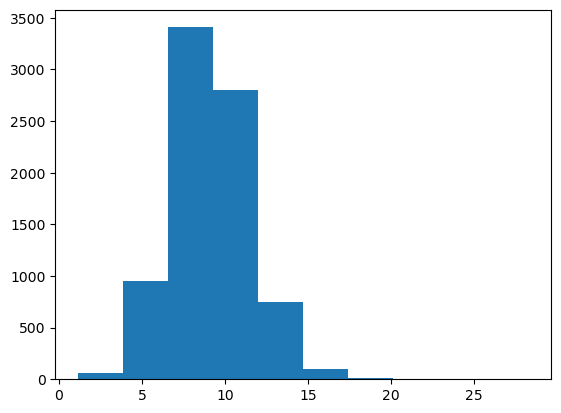

In [13]:
# Histograma da Ingestão de Sal

plt.hist(sal['Ingestao_Sal']);

In [15]:
# Ingestão de Sal tem média 9,14g/dia e desvio padrão de 2.32g/dia

# Criar a variável z_score_sal com média 0 e variância igual a 1
sal['zscore_sal'] = (sal['Ingestao_Sal'] - np.mean(sal['Ingestao_Sal']))/np.std(sal['Ingestao_Sal'])

                    

In [17]:
sal.head()

,ID,Ingestao_Sal,regiao,p75,zscore_sal
0,1,8.56,Centro-Oeste,Menor p75,-0.248639
1,2,7.44,Norte,Menor p75,-0.732065
2,3,10.30,Nordeste,Menor p75,0.502397
3,4,7.68,Nordeste,Menor p75,-0.628473
4,7,10.08,Nordeste,Menor p75,0.407438


In [19]:
sal.describe().round(2)

,ID,Ingestao_Sal,zscore_sal
count,8080.00,8080.00,8080.00
mean,4469.62,9.14,0.00
std,2576.91,2.32,1.00
min,1.00,1.13,-3.46
25%,2237.75,7.63,-0.65
50%,4473.00,9.02,-0.05
75%,6716.50,10.55,0.61
max,8949.00,28.28,8.26


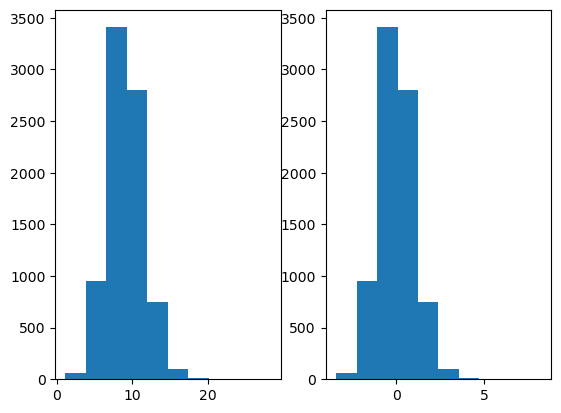

In [21]:
# Gráfico histograma da Ingestão de Sal e Z_score_sal
plt.subplot(1,2,1)
plt.hist(sal['Ingestao_Sal'], bins=10)
plt.subplot(1,2,2)
plt.hist(sal['zscore_sal'], bins=10);

#### Outra opção de Transformação de dados

## Normalização dos dados
 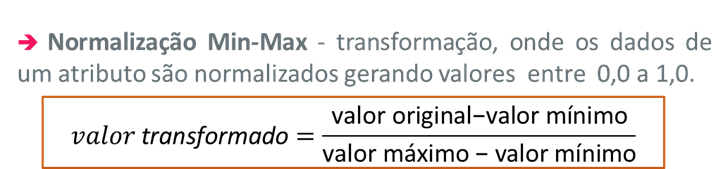

In [23]:
# Criar a variável padronizada da Ingestão de Sal usando o critério do Máximo e Mínimo

sal['sal_normalizado'] = (sal['Ingestao_Sal'] -  np.min(sal['Ingestao_Sal']))/(np.max(sal['Ingestao_Sal']) - np.min(sal['Ingestao_Sal']))

In [25]:
sal.describe().round(2)

,ID,Ingestao_Sal,zscore_sal,sal_normalizado
count,8080.00,8080.00,8080.00,8080.00
mean,4469.62,9.14,0.00,0.29
std,2576.91,2.32,1.00,0.09
min,1.00,1.13,-3.46,0.00
25%,2237.75,7.63,-0.65,0.24
50%,4473.00,9.02,-0.05,0.29
75%,6716.50,10.55,0.61,0.35
max,8949.00,28.28,8.26,1.00


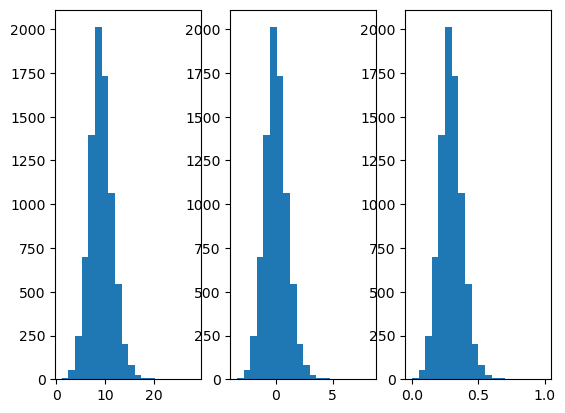

In [27]:
# Fazer o gráfico histograma da Ingestão de Sal e sal_normalizada
plt.subplot(1,3,1)
plt.hist(sal['Ingestao_Sal'], bins=20)
plt.subplot(1,3,2)
plt.hist(sal['zscore_sal'], bins=20)
plt.subplot(1,3,3)
plt.hist(sal['sal_normalizado'], bins=20);


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.norm.html

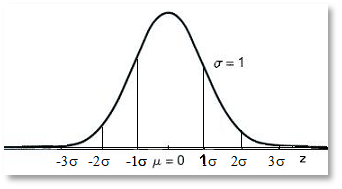

Method	Meaning
cdf	Cumulative distribution function
sf	Survival function = complementary CDF

## Qual a probabilidade da ingestão de sal ser maior que 8.56 g/dia?




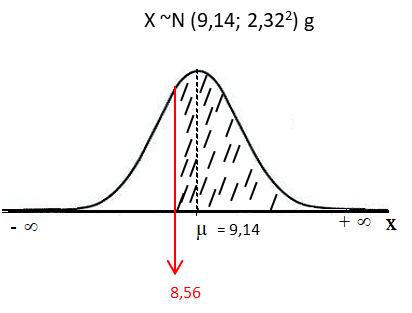

In [29]:
valor=(8.56- np.mean(sal['Ingestao_Sal']))/np.std(sal['Ingestao_Sal'])
valor

-0.24863926934977507

     distribuição gaussiana:
     
     norm.sf(x, loc=0, scale=1)    Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).
     
     norm.cdf(x, loc=0, scale=1)   função de distribuição cumulativa
     
      

In [31]:
from scipy.stats import norm

# Qual a probabilidade da ingestão de sal ser maior que 8.56 g/dia?

# sf(x, loc=0, scale=1)  Survival function (also defined as 1 - cdf, but sf is sometimes more accurate).

norm.sf(8.56,9.14,2.32)

0.5987063256829237

## Qual a probabilidade da ingestão de sal ser menor que 8.56g/dia

In [33]:
# Qual a probabilidade da ingestão de sal ser menor que 8.56g/dia

# cdf(x, loc=0, scale=1) Cumulative distribution function.

norm.cdf(8.56,9.14,2.32)

0.40129367431707624

## Qual a probabilidade da ingestão de sal ser entre 8g/dia e 10g/dia?

In [35]:
# Qual a probabilidade da ingestão de sal ser entre 8g/dia e 10g/dia?
# Probabilidade da ingestão de sal ser  é menor que 10 e maior que 8 

norm.cdf(10,9.14,2.32)-norm.cdf(8,9.14,2.32)


0.3329865544894139

## Qual a probabilidade da ingestão de sal é menor que 6g/dia ou maior que 10g/dia

In [37]:
# Qual a probabilidade da ingestão de sal é menor que 6g/dia ou maior que 10g/dia

norm.cdf(6,9.14,2.32) + norm.sf(10,9.14,2.32)



0.4433905799625485

### O tempo gasto no exame vestibular de uma universidade tem distribuição Normal
### com média 120 min e desvio padrão 15 min.


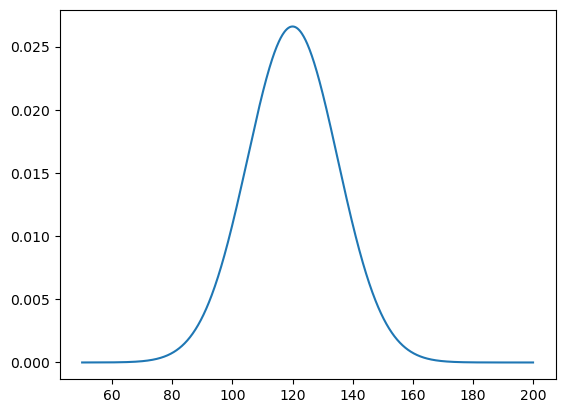

In [39]:
x = np.linspace(50, 200, 1000)
plt.plot(x, norm.pdf(x, loc=120, scale=15))
plt.show()

In [41]:
# Vestibular 

# Probabilidade do aluno terminar a prova em até 130 min

norm.cdf(130,120,15)


0.7475074624530771

In [43]:
# Vestibular 

# Probabilidade do aluno terminar a prova em até 100 min
norm.cdf(100,120,15)

0.09121121972586788

In [45]:
# Vestibular 

# Probabilidade do aluno terminar a prova com mais de 150min

norm.sf(150,120,15)

0.022750131948179198

In [47]:
1-norm.cdf(150,120,15)

0.02275013194817921

In [49]:
norm.sf(120,120,15)

0.5

In [51]:
# Qual a probabilidade do aluno terminar a prova entre +/- 1 desvio

norm.cdf(120+1*15,120,15)-norm.cdf(120-1*15,120,15)


0.6826894921370859

In [53]:
 # Qual a probabilidade do aluno terminar a prova entre +/- 2 desvio

norm.cdf(120+2*15,120,15)-norm.cdf(120-2*15,120,15)

0.9544997361036416